In [23]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# create a connection to local db file

In [4]:
db_conn = sqlite3.connect("league.db")

In [5]:
# simple test: how many champions in total

In [7]:
sql = "SELECT COUNT(championName) as total_champions FROM Champions"
pd.read_sql(sql, con = db_conn)

,total_champions
0,161


In [ ]:
# total matches, # of games that red/blue team win

In [32]:
sql2 = "SELECT COUNT(matchId) as total_games, SUM(winner = 100) AS blue_team_win, SUM(winner = 200) AS red_team_win FROM Matches"
df = pd.read_sql(sql2 ,con = db_conn)
df = pd.melt(df)
print(df)

        variable  value
0    total_games  43995
1  blue_team_win  22030
2   red_team_win  21965


Text(0, 0.5, 'Numbers of Game Each Team Won')

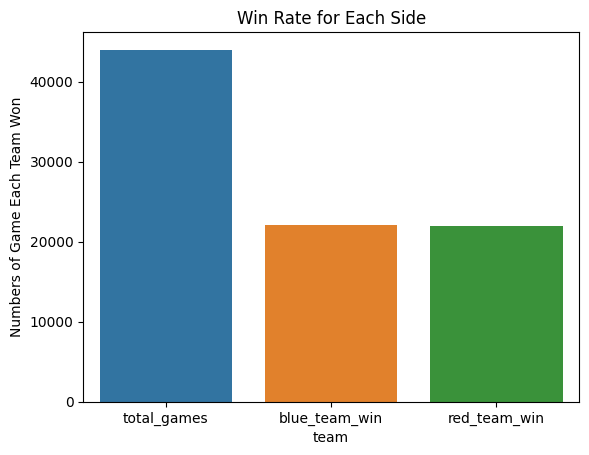

In [34]:
ax = sns.barplot(x = 'variable', y= 'value', data=df)
plt.title("Win Rate for Each Side")
plt.xlabel("team")
plt.ylabel("Numbers of Game Each Team Won")

In [31]:
# win rate for each champoin
sql3 = ("SELECT ch.championName, COUNT(m.winner) as games_won_by_champ FROM Champions as ch JOIN Participants as p on ch.championId = p.championId JOIN Matches as m on p.matchId = m.matchId WHERE m.winner = p.teamId GROUP BY ch.championName ORDER BY championName ASC")
df1 = pd.read_sql(sql3, con = db_conn)
# print(df)
sql4 = "select Champions.championName, count(*) as total from Participants join Champions on Participants.championId == Champions.championId join Matches on Matches.matchId == Participants.matchId group by championName Order BY championName"
df2 = pd.read_sql(sql4, con = db_conn)
# print(df2)
dataframe = pd.DataFrame().assign(ChampionName=df1['championName'], gamesWon=df1['games_won_by_champ'], total=df2['total'])
dataframe['percentage'] = np.nan
dataframe['percentage'] = dataframe['gamesWon']/dataframe['total'] * 100
dataframe['percentage'] = dataframe['percentage'].apply(lambda x: round(x, 2))
dataframe


,ChampionName,gamesWon,total,percentage
0,Aatrox,2491,4924,50.59
1,Ahri,1383,2843,48.65
2,Akali,2590,5410,47.87
3,Akshan,820,1694,48.41
4,Alistar,567,1135,49.96
...,...,...,...,...
156,Zeri,415,942,44.06
157,Ziggs,869,1629,53.35
158,Zilean,910,1735,52.45
159,Zoe,625,1265,49.41
